In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [55]:
def join_two_datasets(df, other_df, fields):

    df['fips'] = df['fips'].astype(int)
    other_df['fips'] = other_df['fips'].astype(int)
    return pd.merge(df, other_df, on=fields)

def read_csv(df_name):
    return pd.read_csv(df_name + '_processed.csv')

In [40]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import plotly.io as pio
init_notebook_mode(connected=True)
print(1)

1


In [41]:
df_chemicals = read_csv('chemicals')
df_chemicals.head()

,cws_name,chemical_species,contaminant_level,county,pws_id,pop_served,state,unit_measurement,value,year,fips,state_fips
0,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,6001,6
1,CITY OF LIVERMORE,Uranium,0,Alameda,CA0110011,26400,California,micrograms/L,1.64,2000,6001,6
2,CITY OF PLEASANTON,Uranium,0,Alameda,CA0110008,70600,California,micrograms/L,1.64,2000,6001,6
3,DUBLIN SAN RAMON SERVICES DISTRICT,Uranium,0,Alameda,CA0110009,72500,California,micrograms/L,1.64,2000,6001,6
4,NORRIS CANYON PROPERTY OWNERS ASSN,Uranium,0,Alameda,CA0103040,100,California,micrograms/L,4.51,2000,6001,6


In [42]:
def create_plotly_map(fips, vals, filename, display=False):
    fips = list(fips)
    vals = list(vals)
    fig = ff.create_choropleth(fips=fips, values=vals)
    print('created figure')
    pio.write_image(fig, filename)
    print('writing figure')
    if display:
        print('drawing figure')
        iplot(fig, filename=filename)
    print('done')

In [ ]:
#df_chemicals_new = df_chemicals.drop(columns=['unit_measurement', 'state', 'pws_id', 'county', 'cws_name', 'state_fips'])
#df_chemicals_new.head()

In [43]:
fips_ids = []
contaminant_levels = []
population_served = []
df_chemicals = df_chemicals.dropna()
#df_chemicals = df_chemicals[df_chemicals['year'] == 2016]
df_chemicals.pop_served = df_chemicals.pop_served.astype(int)
for region, df_region in df_chemicals.groupby('fips'):
    fips_ids.append(region)
    contaminant_levels.append(sum(df_region.value))
    population_served.append(sum(df_region.pop_served))
print(len(fips_ids))
print(len(contaminant_levels))
print(len(population_served))


1413
1413
1413


In [45]:
create_plotly_map(fips_ids, population_served, 'population_map_general.png')

created figure
writing figure
done


In [44]:
create_plotly_map(fips_ids, contaminant_levels, 'contaminant_map_general.png')

created figure
writing figure
done


In [ ]:
print(sum(df_chemicals['state_fips'] == 48))

In [ ]:
df_chemicals = read_csv('earnings')
fips_ids = []
median_earnings = []
df_chemicals = df_chemicals.dropna()
#df_chemicals = df_chemicals[df_chemicals['year'] == 2016]
for region, df_region in df_chemicals.groupby('fips'):
    fips_ids.append(region)
    median_earnings.append(sum(df_region.total_med))
df_chemicals.head()
create_plotly_map(fips_ids, median_earnings, 'earnings_map_2016.png')

In [ ]:
df_chemicals = read_csv('chemicals')
#df_chemicals = df_chemicals[df_chemicals['chemical_species'] == 'Nitrates']
print(len(df_chemicals))
print(len(df_chemicals.fips.unique()))
df_earnings = read_csv('earnings')
df_industry = read_csv('industry_occupation')

In [ ]:
average_by_fips = df_earnings.groupby("fips")
fips = []
yrs = []
avg_values = []

for g in average_by_fips:
    fips.append(g[0])
    avg_values.append(np.mean(g[1]["total_med"]))
fip_to_earnings = dict(zip(fips, avg_values))

In [ ]:
average_by_fips = df_chemicals.groupby("fips")
fips = []
yrs = []
avg_values = []

for g in average_by_fips:
    fips.append(g[0])
    avg_values.append(np.mean(g[1]["value"]))
fip_to_contamination = dict(zip(fips, avg_values))

In [ ]:
contamination_to_earnings = {}
contam = []
earn = []
for fip in fip_to_earnings:
    if fip in fip_to_contamination:
        contam.append(fip_to_contamination[fip])
        earn.append(fip_to_earnings[fip])
        contamination_to_earnings[fip_to_contamination[fip]] = fip_to_earnings[fip]
print(len(contam))
print(len(earn))

In [ ]:
stats.pearsonr(contam, earn)

In [3]:
df_industry = read_csv('industry_occupation')

In [4]:
df_industry.columns

Index(['geo_id', 'fips', 'county', 'total_employed', 'agriculture',
       'construction', 'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_utilities', 'information', 'finance_insurance_realestate',
       'prof_scientific_waste', 'edu_health', 'arts_recreation', 'other',
       'public_admin', 'year'],
      dtype='object')

In [5]:
fips_to_agro = {}
df_industry = df_industry.dropna(subset=['agriculture'])
df_industry.head()



,geo_id,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin,year
0,0500000US01003,1003,"Baldwin County, Alabama",77263.0,1302.0,6489.0,6134.0,2131.0,9525.0,3557.0,940.0,5893.0,9873.0,14753.0,8257.0,3575.0,4834.0,2010
1,0500000US01015,1015,"Calhoun County, Alabama",42768.0,337.0,1371.0,7868.0,750.0,5706.0,1626.0,779.0,2234.0,3776.0,8351.0,3799.0,2440.0,3731.0,2010
6,0500000US01069,1069,"Houston County, Alabama",45470.0,790.0,2967.0,4237.0,1897.0,6225.0,2838.0,670.0,1980.0,3458.0,9843.0,5200.0,2658.0,2707.0,2010
7,0500000US01073,1073,"Jefferson County, Alabama",289454.0,1761.0,17682.0,27091.0,8859.0,34024.0,14727.0,8309.0,25021.0,29164.0,67630.0,26357.0,15828.0,13001.0,2010
8,0500000US01077,1077,"Lauderdale County, Alabama",39581.0,946.0,3579.0,4285.0,1364.0,6047.0,2474.0,439.0,1771.0,2710.0,8624.0,3551.0,3148.0,643.0,2010


In [6]:
fips_names = list(df_industry.fips)
agro_names = list(df_industry.agriculture)
for f, a in zip(fips_names, agro_names):
    fips_to_agro[f] = a

In [7]:
df_chemicals = read_csv('chemicals')
df_chemicals = df_chemicals[df_chemicals['chemical_species'] == 'Nitrates']
df_chemicals.dropna()
average_by_fips = df_chemicals.groupby("fips")
fips_to_contam = {}
for g in average_by_fips:
    fips_to_contam[g[0]] = np.mean(g[1]["value"])

In [8]:

contam = []
agro = []
for fip in fips_to_contam:
    if fip in fips_to_agro:
        contam.append(fips_to_contam[fip])
        agro.append(fips_to_agro[fip])
print(contam)
print(agro)
stats.pearsonr(contam, agro)

[1225.8490566037735, 1328.4028776978416, 1540.7628865979382, 389.0, 2267.772466539197, 822.4603174603175, 775.0909090909091, 2828.9590202543573, 529.8979591836735, 1787.1815718157181, 1309.1601866251945, 1026.3057324840765, 678.3262711864406, 3019.135802469136, 3114.295719844358, 657.5945017182131, 452.3478260869565, 1367.371794871795, 368.1372549019608, 2172.5050709939146, 1384.9065420560748, 2110.2448979591836, 1694.6320346320347, 198.955223880597, 2400.4065040650407, 1899.6184210526317, 610.079575596817, 1726.848, 2769.6559633027523, 1042.837837837838, 991.8712574850299, 949.84375, 1315.0705270972533, 3403.850855745721, 4271.789473684211, 5103.303085299455, 2111.625, 3489.468085106383, 712.6422764227642, 941.5486725663717, 348.94329896907215, 35.55555555555556, 101.11111111111111, 230.87570621468927, 1300.028409090909, 992.5133689839572, 552.9591836734694, 344.8292682926829, 1202.2926829268292, 1344.2173913043478, 1783.7142857142858, 1694.4695898161244, 1193.6963696369637, 954.93167

(0.31907991602105085, 2.827167976404234e-11)

In [ ]:
import seaborn as sns

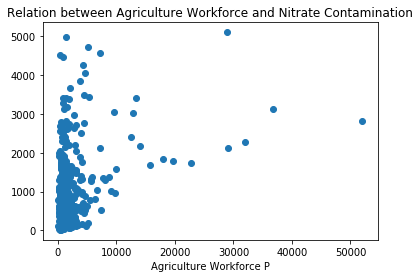

In [10]:

plt.title('Relation between Agriculture Workforce and Nitrate Contamination')
plt.scatter(agro, contam)
plt.xlabel('Agriculture Workforce')
plt.savefig('chemicals_workforce.png')

[1225.8490566037735, 1328.4028776978416, 1540.7628865979382, 389.0, 2267.772466539197, 822.4603174603175, 775.0909090909091, 2828.9590202543573, 529.8979591836735, 1787.1815718157181, 1309.1601866251945, 1026.3057324840765, 678.3262711864406, 3019.135802469136, 3114.295719844358, 657.5945017182131, 452.3478260869565, 1367.371794871795, 368.1372549019608, 2172.5050709939146, 1384.9065420560748, 2110.2448979591836, 1694.6320346320347, 198.955223880597, 2400.4065040650407, 1899.6184210526317, 610.079575596817, 1726.848, 2769.6559633027523, 1042.837837837838, 991.8712574850299, 949.84375, 1315.0705270972533, 3403.850855745721, 4271.789473684211, 5103.303085299455, 2111.625, 3489.468085106383, 712.6422764227642, 941.5486725663717, 348.94329896907215, 35.55555555555556, 101.11111111111111, 230.87570621468927, 1300.028409090909, 992.5133689839572, 552.9591836734694, 344.8292682926829, 1202.2926829268292, 1344.2173913043478, 1783.7142857142858, 1694.4695898161244, 1193.6963696369637, 954.93167

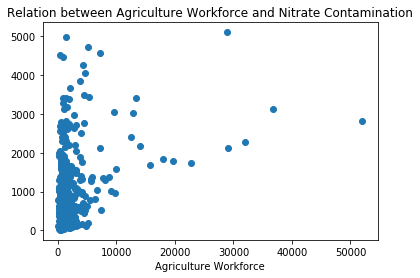

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
def read_csv(df_name):
    return pd.read_csv(df_name + '_processed.csv')
df_industry = read_csv('industry_occupation')
fips_to_agro = {}
df_industry = df_industry.dropna(subset=['agriculture'])
fips_names = list(df_industry.fips)
agro_names = list(df_industry.agriculture)
for f, a in zip(fips_names, agro_names):
    fips_to_agro[f] = a
df_chemicals = read_csv('chemicals')
df_chemicals = df_chemicals[df_chemicals['chemical_species'] == 'Nitrates']
df_chemicals.dropna()
average_by_fips = df_chemicals.groupby("fips")
fips_to_contam = {}
for g in average_by_fips:
    fips_to_contam[g[0]] = np.mean(g[1]["value"])
contam = []
agro = []
for fip in fips_to_contam:
    if fip in fips_to_agro:
        contam.append(fips_to_contam[fip])
        agro.append(fips_to_agro[fip])
print(contam)
print(agro)
stats.pearsonr(contam, agro)
plt.title('Relation between Agriculture Workforce and Nitrate Contamination')
plt.scatter(agro, contam)
plt.xlabel('Agriculture Workforce')
plt.savefig('chemicals_workforce.png')

In [65]:

df_chemicals = read_csv('chemicals')
df_earnings = read_csv('earnings')
df_industry = read_csv('industry_occupation')

print(df_industry.columns)
print(df_earnings.columns)
#df_chemicals.head()
#df_main = join_two_datasets(df_chemicals, df_earnings, ['fips'])
df_main = join_two_datasets(df_chemicals, df_industry, ['fips'])
print(df_main.columns)

Index(['geo_id', 'fips', 'county', 'total_employed', 'agriculture',
       'construction', 'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_utilities', 'information', 'finance_insurance_realestate',
       'prof_scientific_waste', 'edu_health', 'arts_recreation', 'other',
       'public_admin', 'year'],
      dtype='object')
Index(['geo_id', 'fips', 'county', 'total_med', 'total_agri_fish_mine',
       'agri_fish_hunt', 'mining_quarrying_oilgas_extract', 'construction',
       'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_warehouse_utilities', 'transport_warehouse', 'utilities',
       'information', 'fin_ins_realest', 'fin_ins', 'realest_rent_lease',
       'total_prof_sci_mgmt_admin', 'prof_sci_tech', 'mgmt', 'admin_sup',
       'total_edu_health_social', 'edu_serv', 'health_social',
       'total_arts_ent_acc_food', 'arts_ent_rec', 'acc_food_serv', 'other_ser',
       'pub_admin', 'year'],
      dtype='object')
Index(['cws_name', 'chemica

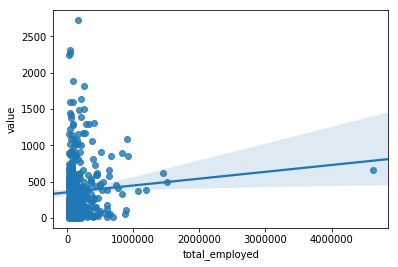

In [57]:
ax = sns.regplot(x="total_employed", y="value", data=df_main, x_jitter=.1)

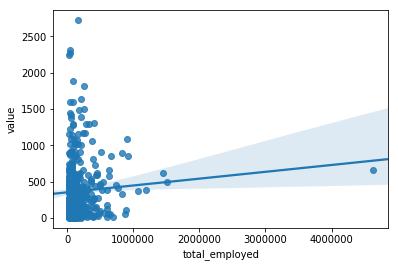

In [58]:
ax = sns.regplot(x="total_employed", y="value", data=df_main, x_jitter=.1)

ValueError: Unknown label type: 'continuous'

In [78]:
df_main = df_main[['total_employed', 'contaminant_level', 'pop_served', 'agriculture', 'value']]
df_main = df_main.apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()
df_main = df_main.astype(int)

Automatically created module for IPython interactive environment


ValueError: c of shape (1476990, 1) not acceptable as a color sequence for x with size 1476990, y with size 1476990

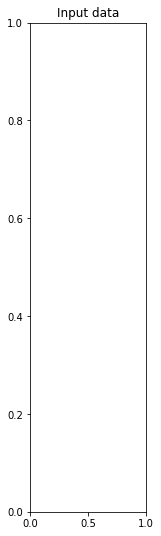

In [82]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = df_main[['contaminant_level','agriculture']], df_main[['value']]
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [85]:

chem_df = read_csv('chemicals')
earn_df = read_csv('earnings')
df_main = join_two_datasets(chem_df, earn_df, 'fips')
print(df_main.columns)
df_main.head()

Index(['cws_name', 'chemical_species', 'contaminant_level', 'county_x',
       'pws_id', 'pop_served', 'state', 'unit_measurement', 'value', 'year_x',
       'fips', 'state_fips', 'geo_id', 'county_y', 'total_med',
       'total_agri_fish_mine', 'agri_fish_hunt',
       'mining_quarrying_oilgas_extract', 'construction', 'manufacturing',
       'wholesale_trade', 'retail_trade', 'transport_warehouse_utilities',
       'transport_warehouse', 'utilities', 'information', 'fin_ins_realest',
       'fin_ins', 'realest_rent_lease', 'total_prof_sci_mgmt_admin',
       'prof_sci_tech', 'mgmt', 'admin_sup', 'total_edu_health_social',
       'edu_serv', 'health_social', 'total_arts_ent_acc_food', 'arts_ent_rec',
       'acc_food_serv', 'other_ser', 'pub_admin', 'year_y'],
      dtype='object')


,cws_name,chemical_species,contaminant_level,county_x,pws_id,pop_served,state,unit_measurement,value,year_x,...,admin_sup,total_edu_health_social,edu_serv,health_social,total_arts_ent_acc_food,arts_ent_rec,acc_food_serv,other_ser,pub_admin,year_y
0,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,...,27106,41162.0,40419,41779,19476,25036,17871,26961,65466,2010
1,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,...,27328,42171.0,41478,42892,19561,25636,18246,27125,69809,2011
2,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,...,27852,42632.0,41579,43571,19696,25983,18414,27304,68787,2012
3,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,...,27410,43094.0,41756,44151,19830,25676,18385,26796,68604,2013
4,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,0,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,...,27770,42805.0,41688,43733,19521,25235,18111,26815,67752,2014


In [ ]:
df_main

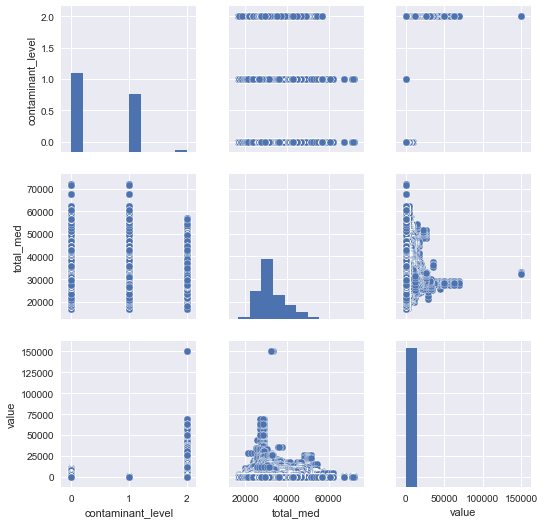

In [88]:
sns.set()
cols = ['contaminant_level', 'chemical_species', 'admin_sup', 'total_agri_fish_mine', 'total_med', 'value']
sns.pairplot(df_main[cols], size = 2.5)
plt.show();